# Threads and Processes

In [3]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import numpy as np
import time
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import string
%matplotlib inline

In [4]:
MULTITHREADING_TITLE="Multithreading"
MULTIPROCESSING_TITLE="Multiprocessing"

def visualize_runtimes(results, title):
    start,stop = np.array(results).T
    plt.barh(range(len(start)),stop-start,left=start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    return stop[-1]-start[0]

In [5]:
def multithreading(func, args, workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)
        
def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)

## API Calls

In [6]:
from urllib.request import urlopen

def download(url, base):
    start = time.time() - base
    try:
        resp = urlopen(url)
    except Exception as e:
        print ('ERROR: %s' % e)
    stop = time.time() - base
    return start,stop

In [11]:
N = 16
URL = 'https://contentserver.adobe.com/store/books/HuckFinn.pdf'
urls = [URL for i in range(N)]

### Serial

In [12]:
%timeit -n 1 [download(url, 1) for url in urls]

34.6 s ± 4.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Multithreading

25.052574157714844

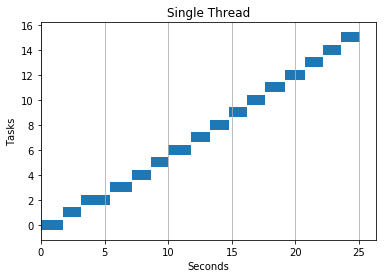

In [13]:
visualize_runtimes(multithreading(download, urls, 1), "Single Thread")

12.085877895355225

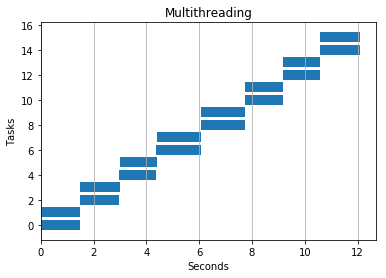

In [14]:
visualize_runtimes(multithreading(download, urls, 2),MULTITHREADING_TITLE)

5.805537223815918

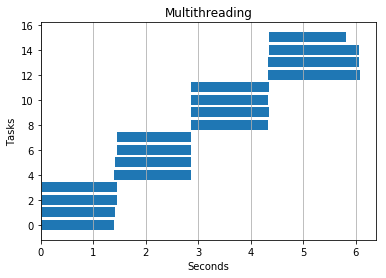

In [15]:
visualize_runtimes(multithreading(download, urls, 4),MULTITHREADING_TITLE)

### Multiprocessing

23.13641333580017

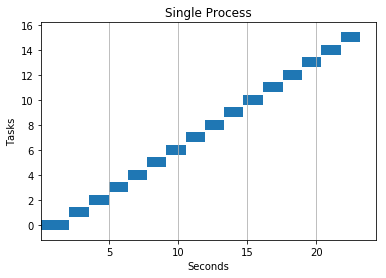

In [16]:
visualize_runtimes(multiprocessing(download, urls, 1), "Single Process")

11.567987203598022

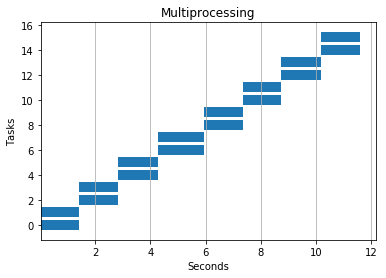

In [17]:
visualize_runtimes(multiprocessing(download, urls, 2), MULTIPROCESSING_TITLE)

5.775312185287476

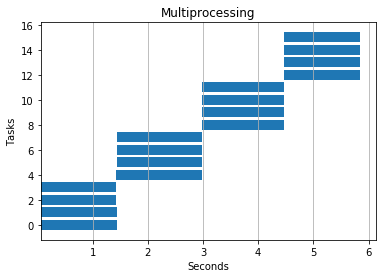

In [18]:
visualize_runtimes(multiprocessing(download, urls, 4), MULTIPROCESSING_TITLE)

## When to use threads vs processes?
* Processes speed up Python operations that are CPU intensive because they benefit from multiple cores and avoid the GIL.
* Threads are best for IO tasks or tasks involving external systems because threads can combine their work more efficiently. Processes need to pickle their results to combine them which takes time.
* Threads provide no benefit in python for CPU intensive tasks because of the GIL.

*For certain operations like Dot Product, Numpy works around Python’s GIL and executes code in parallel.